In [182]:
import sounddevice as sd
import soundfile as sf
import os
import scipy
import matplotlib.pyplot as plt
from time import time
from scipy.signal import stft
import pyroomacoustics as pra
import numpy as np

important both mics should not be used by the system !

In [183]:
# Set up parameters for recording
duration_sec = 5
sample_rate = 44100
channels = 1

In [184]:
# Find the index of the USB microphones
mic_index_1 = None
mic_index_2 = None
devices = sd.query_devices()
for i, dev in enumerate(devices):
    if dev["max_input_channels"] > 0 and "USB" in dev["name"]:
        if mic_index_1 is None:
            mic_index_1 = i
        else:
            mic_index_2 = i
            break


In [185]:
# Open two streams for recording
stream_1 = sd.InputStream(device=mic_index_1, channels=channels, samplerate=sample_rate)
stream_2 = sd.InputStream(device=mic_index_2, channels=channels, samplerate=sample_rate)


In [186]:
os.remove("recording_1.wav")
os.remove("recording_2.wav")

In [187]:
with sf.SoundFile('recording_1.wav', mode='x', samplerate=sample_rate, channels=channels) as file_1, \
     sf.SoundFile('recording_2.wav', mode='x', samplerate=sample_rate, channels=channels) as file_2:
    with stream_1, stream_2:
        for i in range(int(duration_sec * sample_rate)):
            data_1, _ = stream_1.read(1)
            data_2, _ = stream_2.read(1)
            file_1.write(data_1)
            file_2.write(data_2)

In [163]:
# Start recording
n_samples = 10000
sr = 44100
sampling_freq = 44100
fft_length = 512
R = np.array([[0, 0.16], [0, 0]])
with stream_1, stream_2:
    while True:
        samples1 = []
        samples2 = []
        for _ in range(n_samples):
            data_1, _ = stream_1.read(1)
            data_2, _ = stream_2.read(1)
            samples1.append(data_1)
            samples2.append(data_2)
        samples1 = np.array(samples1).flatten()
        samples2 = np.array(samples2).flatten()
        if np.mean(np.abs(samples1)) > 0.001 and np.mean(np.abs(samples2)) > 0.001:
            _, _, Zxx_1 = stft(samples1, fs=sampling_freq, nperseg=fft_length)
            _, _, Zxx_2 = stft(samples2, fs=sampling_freq, nperseg=fft_length)
            Zxx = np.stack((Zxx_1, Zxx_2), axis=0)
            doa = pra.doa.NormMUSIC(R, fs = sr, nfft=fft_length)
            doa.locate_sources(Zxx)
            temp = doa.grid.values
            temp[180:] = 0 # we only take the first half of the spectrum
            angle = (np.argmax(temp))
            angle = angle-90
            # if angle < 0:
            #     print("gauche")
            # if angle >= 0:
            #     print("droite")
            print(angle)
        else:
            print("No sound")


No sound
No sound
No sound
No sound
No sound
No sound
-1
0
-1
3
0
22
0
0
7
14
No sound
No sound
No sound
No sound
No sound
0
35
0
42
39
18
1
-3
2
3
-1
No sound
No sound
No sound
No sound
No sound
-90
34
-24
-71
6
20
22
-14
0
51
-25
12
56
No sound
-25
2
No sound
No sound
No sound
No sound
No sound
No sound
No sound
No sound
56
-23
No sound
No sound
No sound
No sound
No sound
No sound
25
-1
0
No sound
No sound
No sound
No sound
No sound
No sound
No sound
-45
28
0
-27
0
-22
-19
-16
0
0
-19
-17
-20
-23
-24
10
No sound
No sound
No sound
No sound
No sound
No sound
No sound
No sound
39
-29
26
No sound
No sound
No sound
No sound
No sound
No sound
No sound
No sound
-39
No sound
No sound
No sound
No sound
No sound
No sound
No sound
-11
57
51
No sound
No sound
89
No sound
No sound
No sound
No sound
No sound
No sound
No sound
-36
-19
-4
-8
-15
-22
-37
1
2
2
No sound
No sound
No sound
-90
-7
-13
-26
-20
-15
-17
No sound
No sound
No sound
No sound
No sound
No sound
No sound
No sound
No sound
47
-33


KeyboardInterrupt: 

In [38]:
samples1 = np.array(samples1).flatten()

In [85]:
samples1

[array([[-0.00012207]], dtype=float32),
 array([[-3.0517578e-05]], dtype=float32),
 array([[-0.00015259]], dtype=float32),
 array([[-0.00030518]], dtype=float32),
 array([[-0.00033569]], dtype=float32),
 array([[-3.0517578e-05]], dtype=float32),
 array([[-9.1552734e-05]], dtype=float32),
 array([[-6.1035156e-05]], dtype=float32),
 array([[-6.1035156e-05]], dtype=float32),
 array([[9.1552734e-05]], dtype=float32),
 array([[0.00021362]], dtype=float32),
 array([[0.00039673]], dtype=float32),
 array([[0.00027466]], dtype=float32),
 array([[0.00018311]], dtype=float32),
 array([[6.1035156e-05]], dtype=float32),
 array([[-0.00021362]], dtype=float32),
 array([[-0.00024414]], dtype=float32),
 array([[-0.00027466]], dtype=float32),
 array([[-0.00039673]], dtype=float32),
 array([[-0.00054932]], dtype=float32),
 array([[-0.00073242]], dtype=float32),
 array([[-0.00054932]], dtype=float32),
 array([[-0.00048828]], dtype=float32),
 array([[-0.00073242]], dtype=float32),
 array([[-0.00064087]], d

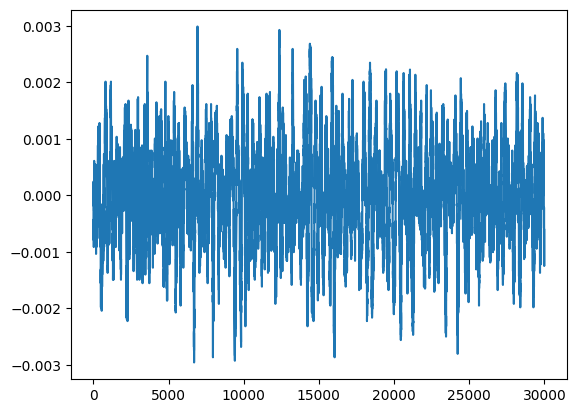

In [39]:
plt.plot(samples1)

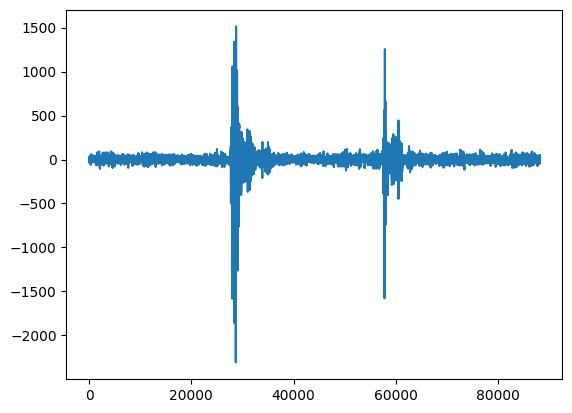

In [7]:
PATH1 = "recording_1.wav"
rate1, data1 = scipy.io.wavfile.read(PATH1)
plt.plot(data1)

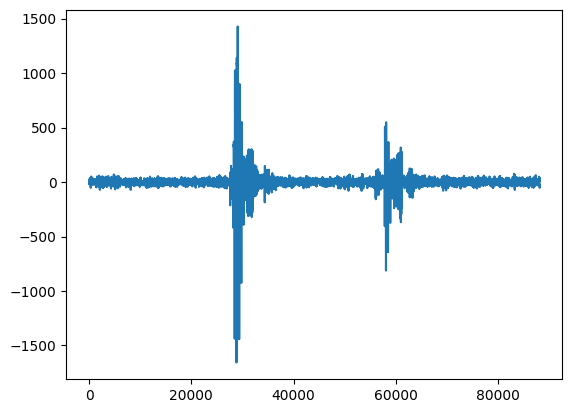

In [8]:
PATH2 = "recording_2.wav"
rate2, data2 = scipy.io.wavfile.read(PATH2)
plt.plot(data2)